In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [531]:
data = pd.read_csv("E:\Intern work answer\Project File\9961_14084_bundle_archive\Train.csv")
# sales = pd.read_csv("E:\Intern work answer\Project File\9961_14084_bundle_archive\Test.csv")

In [532]:
data
# sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [533]:

data.head()

# print(data.info())

# print(data.describe())

# # print(data.describe(include=['object']))

# data.shape

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [535]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [536]:
data.shape

(8523, 12)

In [537]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

In [538]:

data['Item_Weight'].mean()


12.857645184135976

In [539]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [540]:
# data['Outlet_Size'].mode()

In [541]:
# mode_of_Outlet_Size=data.pivot_table(values= 'Outlet_Size', ['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [542]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [543]:
data['Outlet_Size'].mode()


0    Medium
Name: Outlet_Size, dtype: object

In [544]:
mode_of_Outlet_Size=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)



In [545]:
print(mode_of_Outlet_Size)

None


In [546]:
miss_values = data['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [547]:
# data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values, 'Outlet_Type'].apply

In [548]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [549]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# EDA

In [550]:
import klib

In [551]:
sns.set()

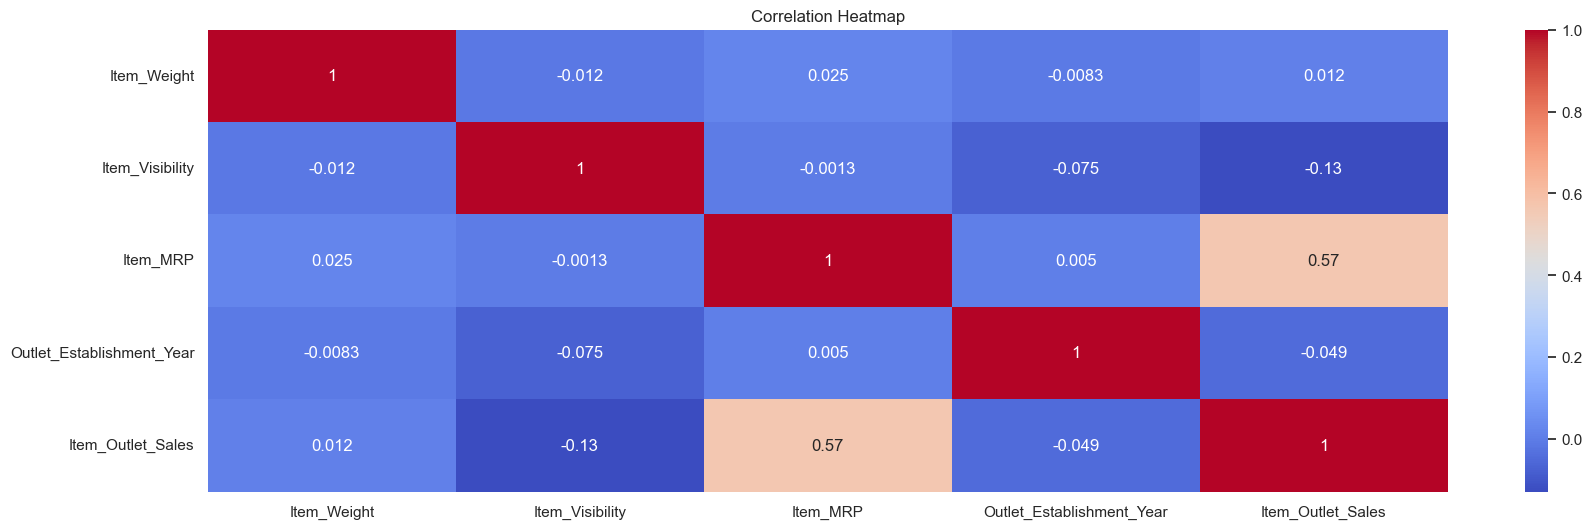

In [552]:
import warnings
warnings.filterwarnings("ignore")

# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



<Axes: title={'center': 'Feature-correlation (pearson)'}>

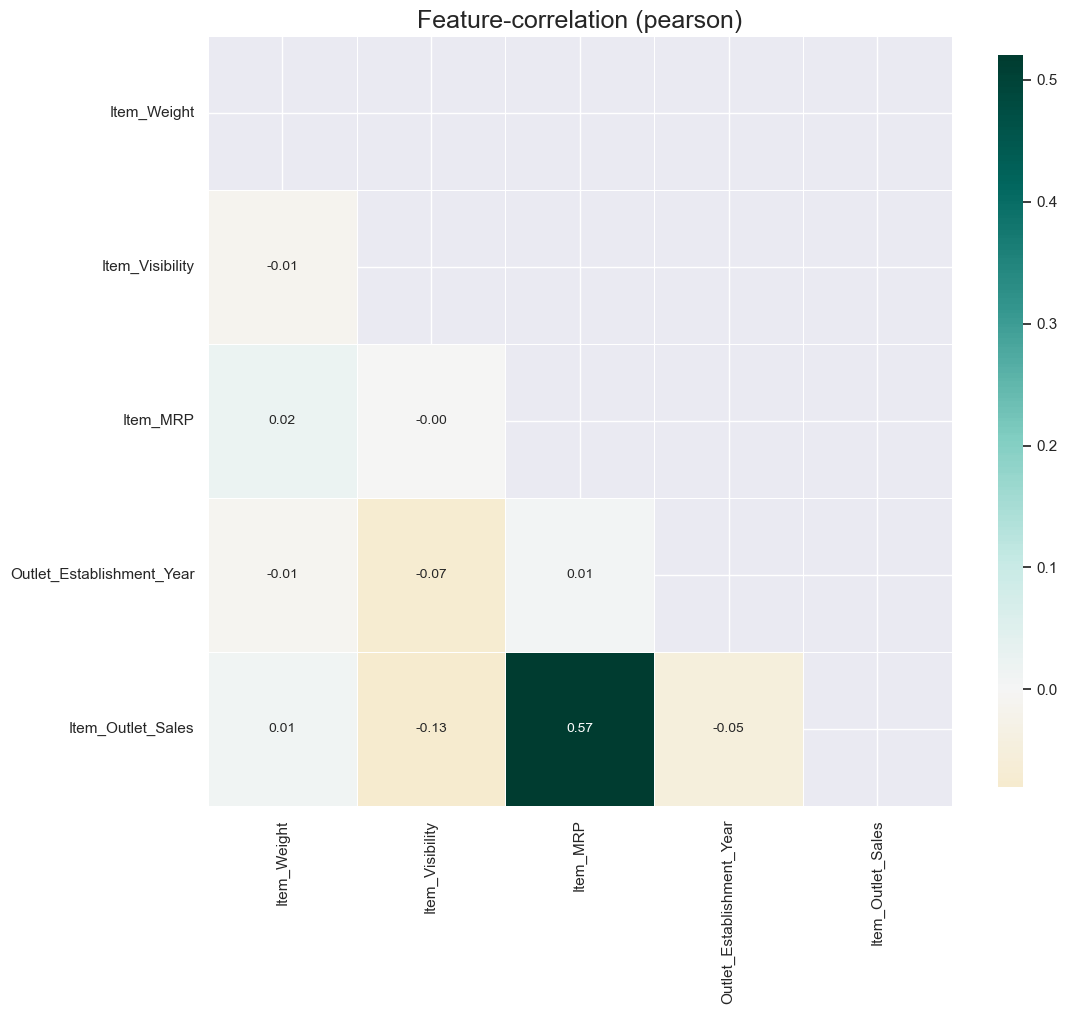

In [553]:
klib.corr_plot(data)

<Axes: xlabel='Item_Weight', ylabel='Density'>

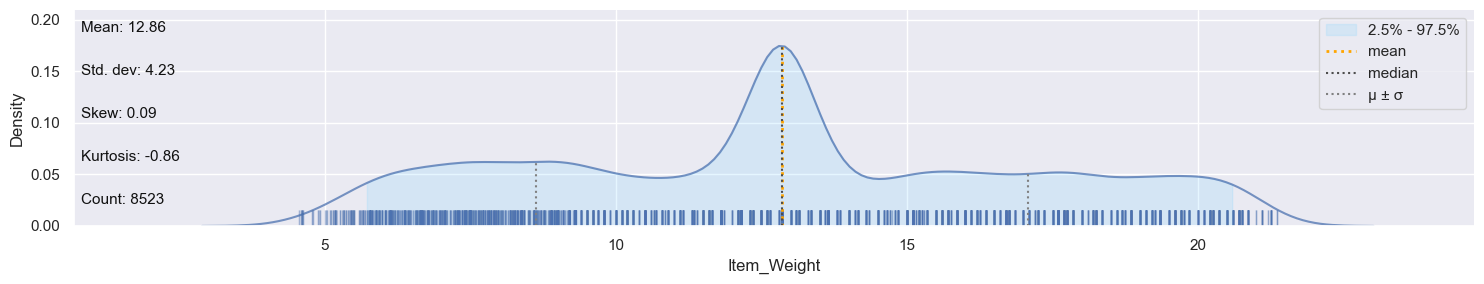

In [554]:
klib.dist_plot(data)

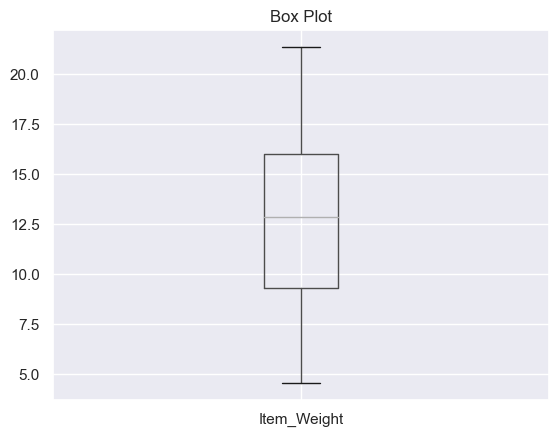

In [555]:
data.boxplot(column=["Item_Weight"])
# plt.show
plt.title('Box Plot')
plt.show()

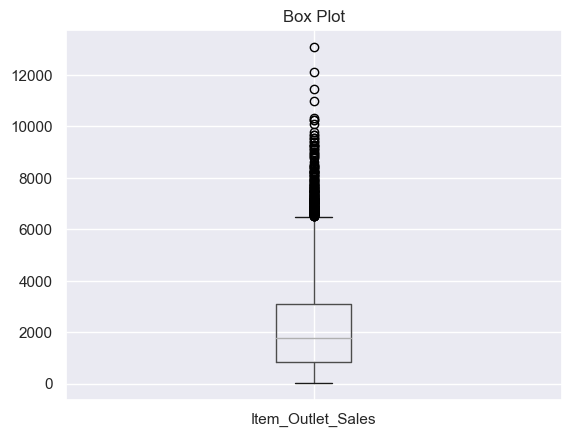

In [556]:
data.boxplot(column=["Item_Outlet_Sales"])
# plt.show
plt.title('Box Plot')
plt.show()

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

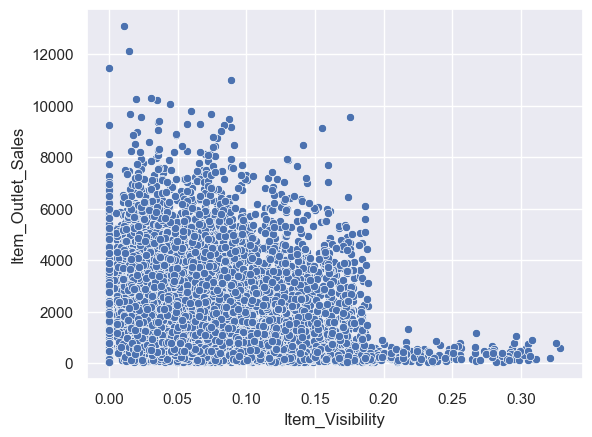

In [557]:
sns.scatterplot(x=data['Item_Visibility'], y=data['Item_Outlet_Sales'])

<Figure size 600x600 with 0 Axes>

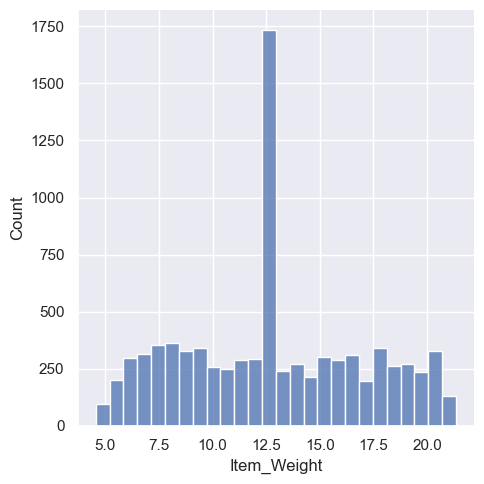

In [558]:
# Item_Weight Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

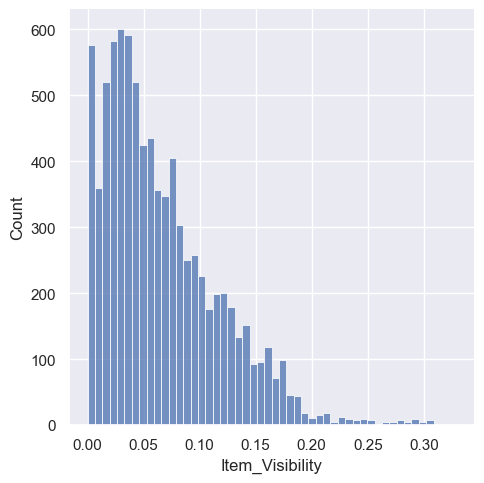

In [559]:
plt.figure(figsize=(6,6))
sns.displot(data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

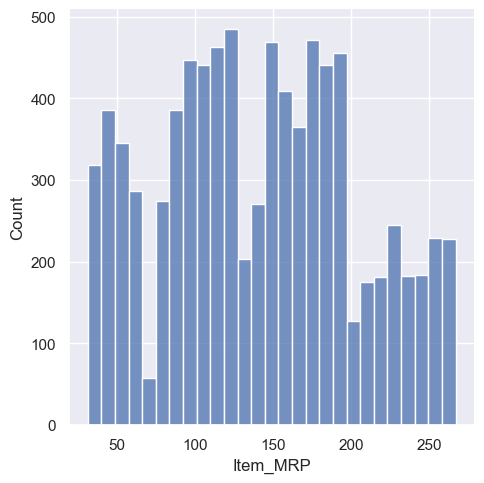

In [560]:
plt.figure(figsize=(6,6))
sns.displot(data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

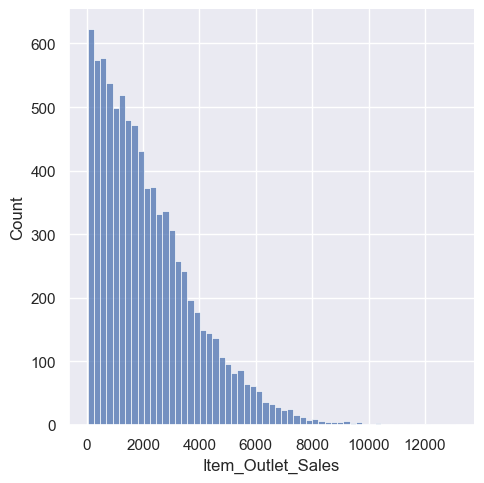

In [561]:
plt.figure(figsize=(6,6))
sns.displot(data['Item_Outlet_Sales'])
plt.show()

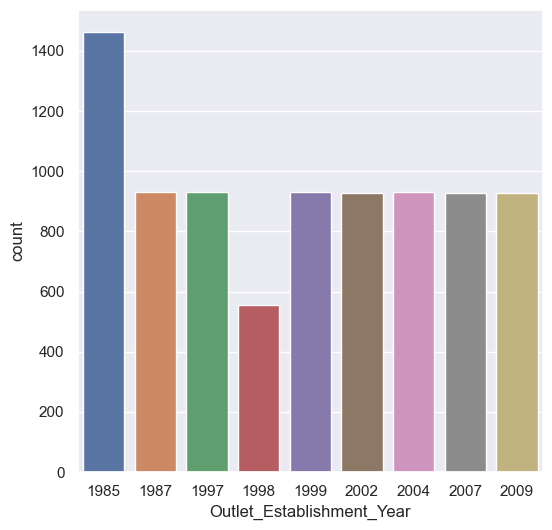

In [562]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=data)
plt.show()

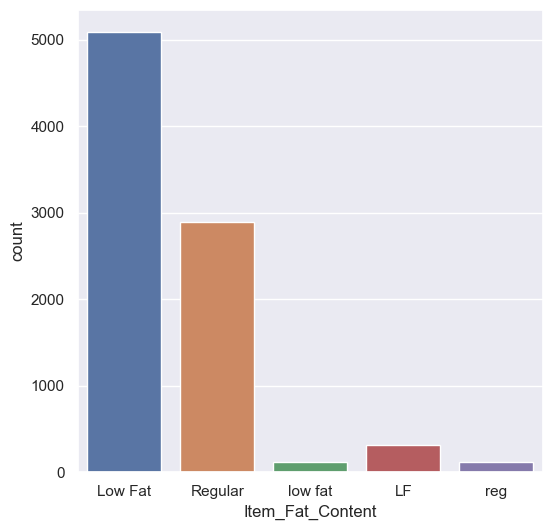

In [563]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=data)
plt.show()

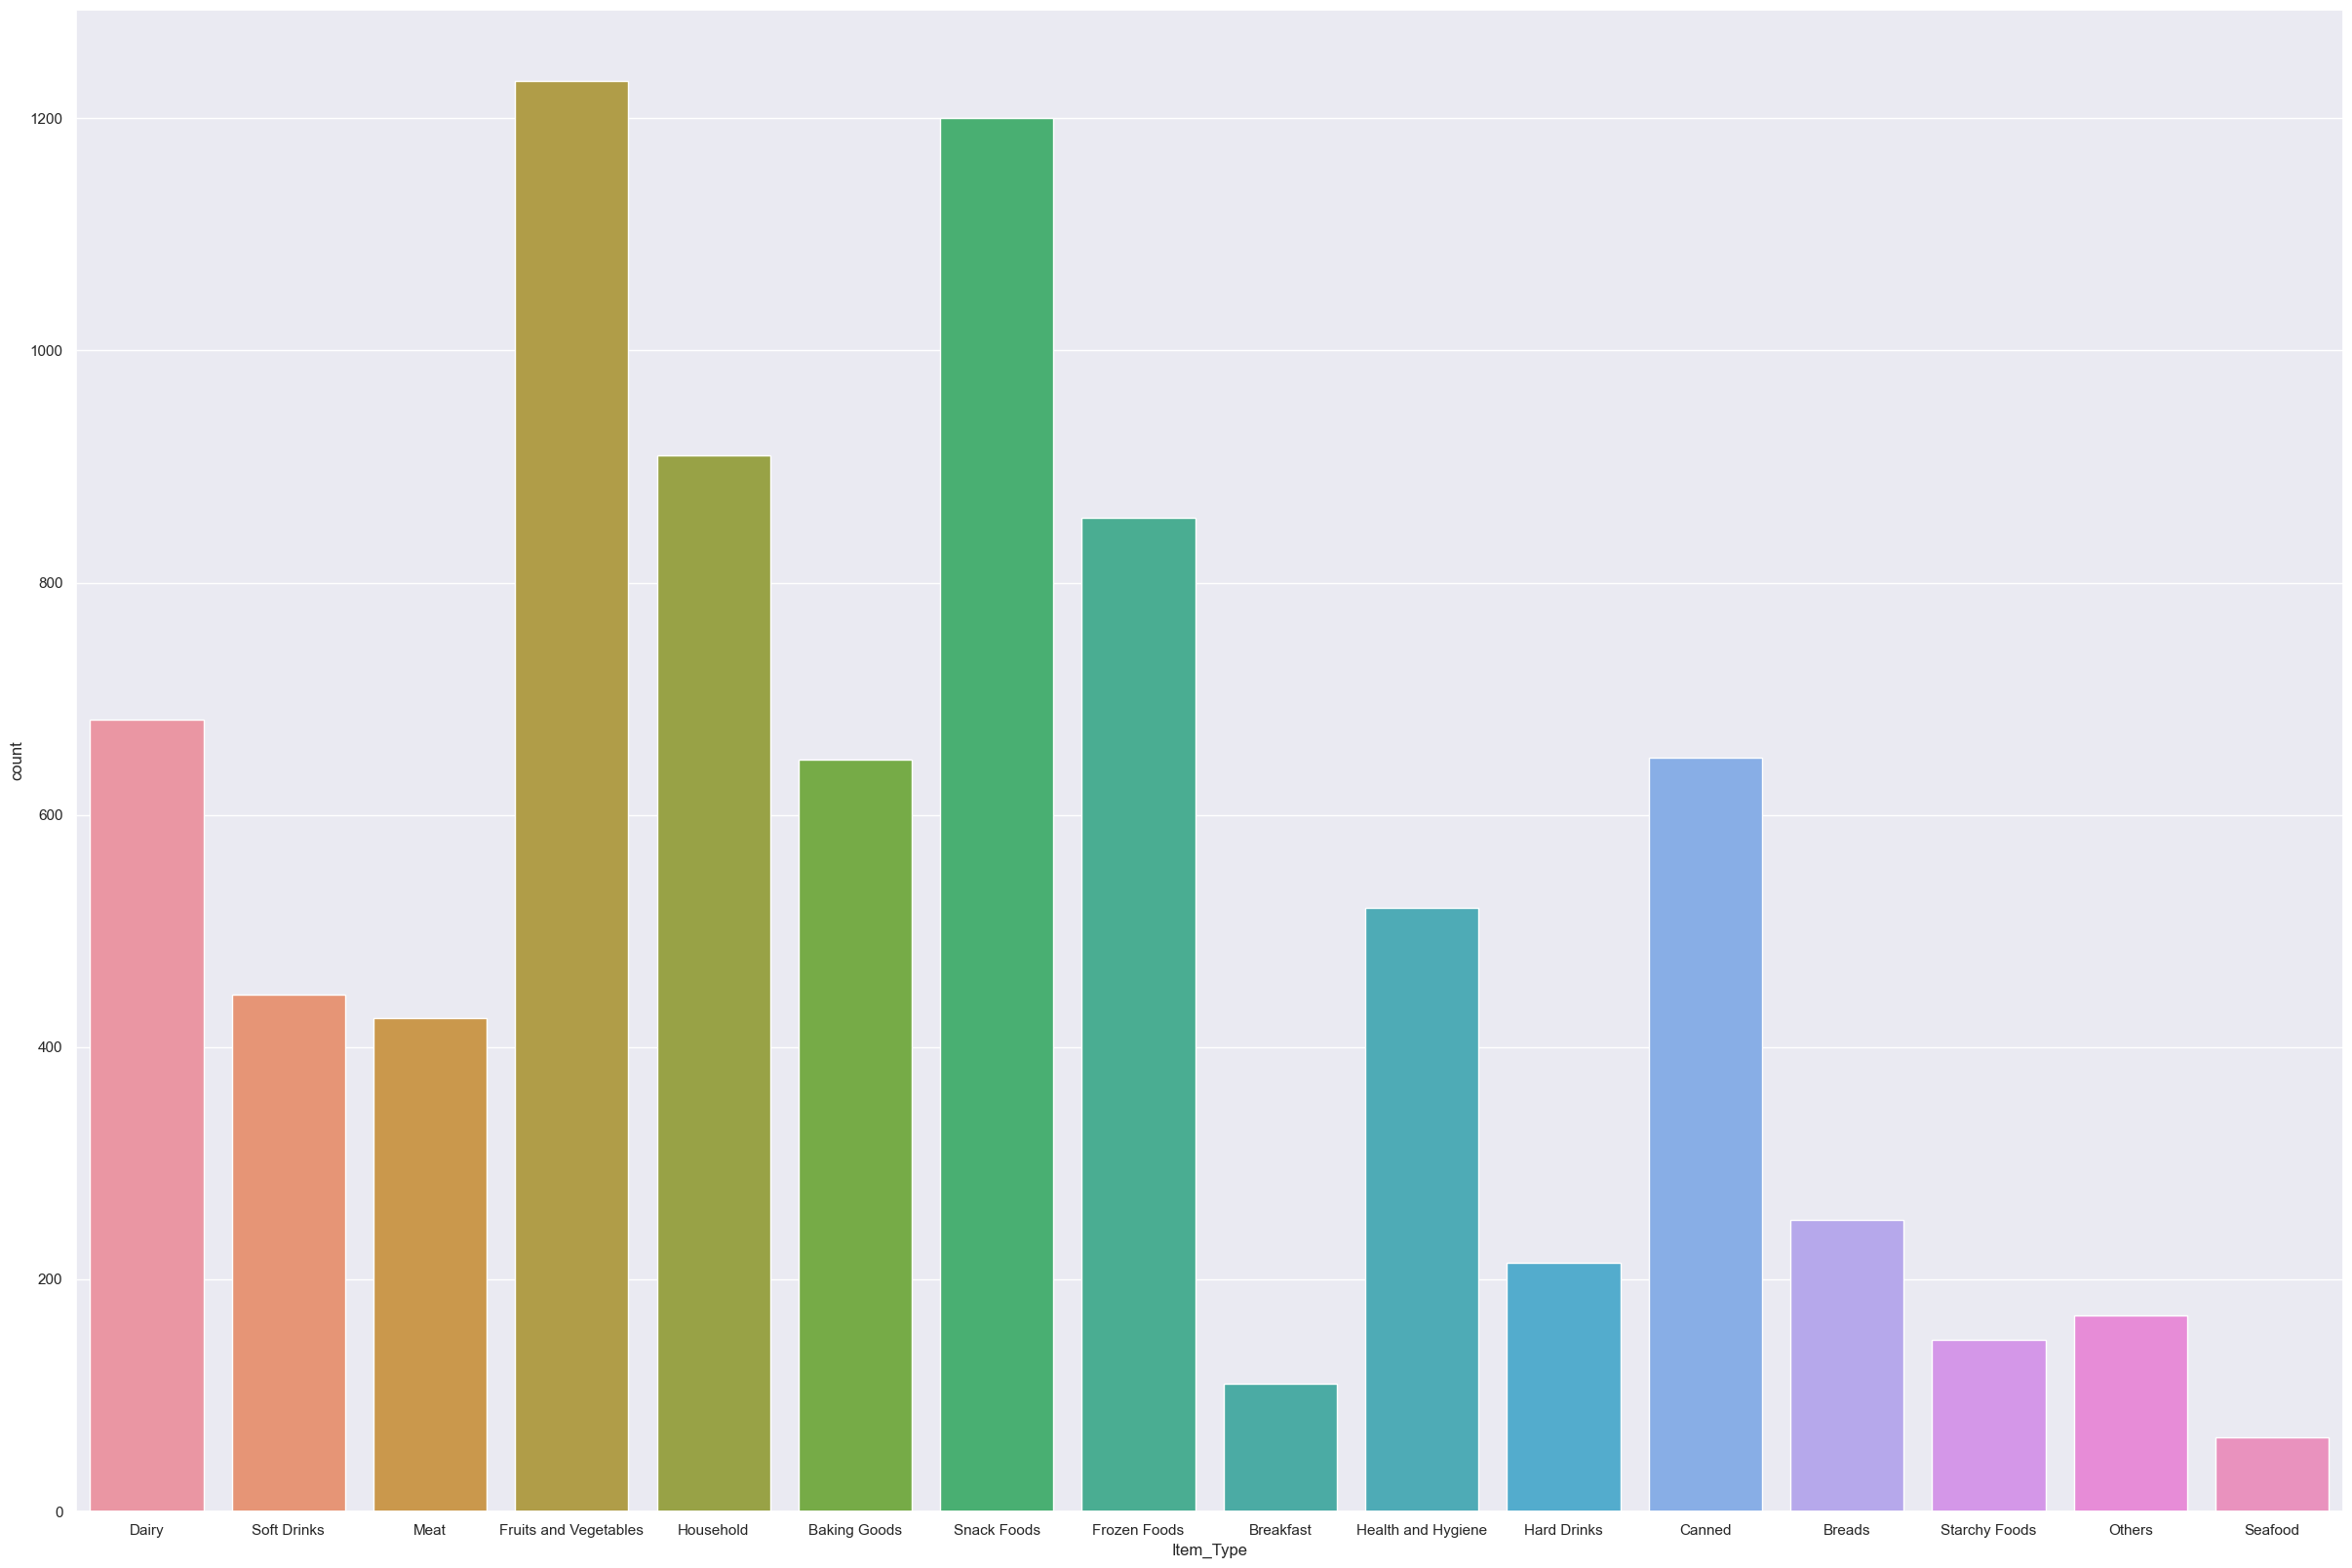

In [564]:
plt.figure(figsize=(30,20))
sns.countplot(x='Item_Type',data=data)
plt.show()

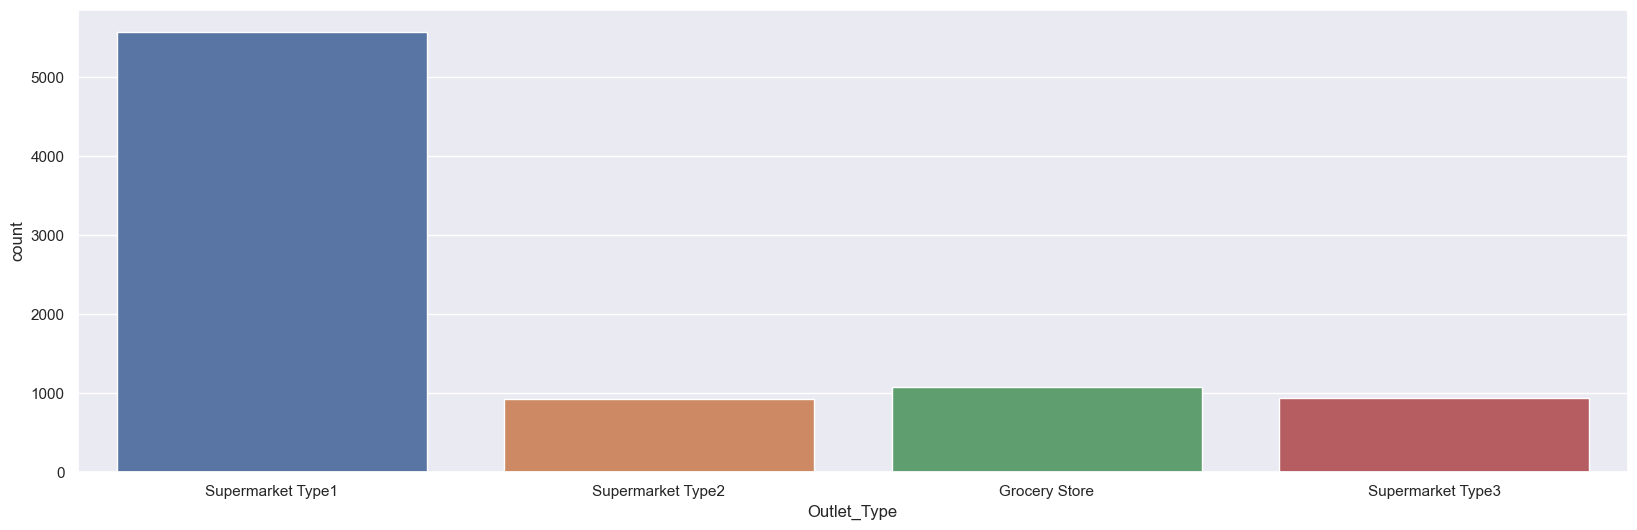

In [565]:
plt.figure(figsize=(20,6))
sns.countplot(x='Outlet_Type',data=data)
plt.show()

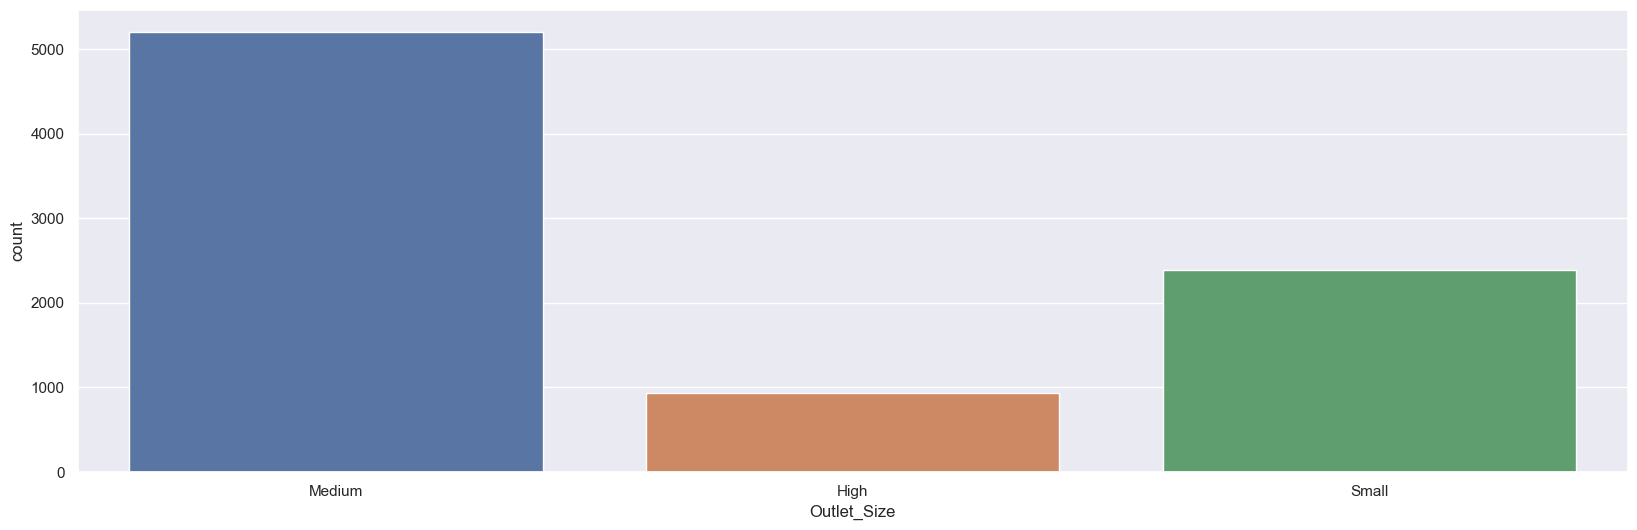

In [566]:
plt.figure(figsize=(20,6))
sns.countplot(x='Outlet_Size',data=data)
plt.show()

# Data pre-processing

In [567]:

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [568]:

# List of columns to be removed
remove_cols = [
    'Item_Identifier',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Establishment_Year'
]

# Drop the specified columns from the DataFrame
data = data.drop(remove_cols, axis=1)

# # Display the updated DataFrame
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [569]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [570]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [571]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [572]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [573]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [574]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Encoding

In [575]:
#Label Encoding

encoder = LabelEncoder()

In [576]:
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])


In [577]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,53.8614,0,2,1,994.7052


In [578]:
 data['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [579]:
 data['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [580]:
 data['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [581]:
 data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

# Splitting features and Target

In [582]:
# Splitting features and Target

x = data.drop(columns= 'Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [583]:
print(x)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0           9.300                 0         0.016047  249.8092            1   
1           5.920                 1         0.019278   48.2692            1   
2          17.500                 0         0.016760  141.6180            1   
3          19.200                 1         0.000000  182.0950            1   
4           8.930                 0         0.000000   53.8614            0   
...           ...               ...              ...       ...          ...   
8518        6.865                 0         0.056783  214.5218            0   
8519        8.380                 1         0.046982  108.1570            1   
8520       10.600                 0         0.035186   85.1224            2   
8521        7.210                 1         0.145221  103.1332            1   
8522       14.800                 0         0.044878   75.4670            2   

      Outlet_Location_Type  Outlet_Type  
0        

In [584]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,249.8092,1,0,1
1,5.92,1,0.019278,48.2692,1,2,2
2,17.50,0,0.016760,141.6180,1,0,1
3,19.20,1,0.000000,182.0950,1,2,0
4,8.93,0,0.000000,53.8614,0,2,1


In [585]:
print(y)


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [586]:
# Splitting the data into Training data & Testing data

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [587]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,11.800000,1,0.057422,149.9366,2,0,1
3315,12.857645,0,0.000000,100.1384,1,2,3
5932,7.725000,0,0.047783,249.1092,2,0,1
7872,10.500000,0,0.052555,89.6830,2,0,1
5946,12.857645,1,0.235859,46.1402,2,0,0


In [588]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 7) (6818, 7) (1705, 7)


# XGBoost Regressor

In [589]:
reagressor = XGBRegressor()

In [590]:
reagressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [591]:
# from sklearn.preprocessing import StandardScaler


In [592]:
# sc = StandardScaler


In [593]:
# x_std = 

# Evaluation

In [594]:
# Evaluation
training_data_prediction = reagressor.predict(x_train)

In [595]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [596]:
print('R Squared value =', r2_train)

R Squared value = 0.8367068088177914


# Machine learing model training 

In [597]:
from sklearn.ensemble import RandomForestRegressor

In [598]:
random_regressor = RandomForestRegressor()

In [599]:
random_regressor.fit(x_train, y_train)

RandomForestRegressor()

# Get Prediction

In [600]:
trainig_data_prediction =random_regressor.predict(x_train)

In [601]:
r2_train= metrics.r2_score(y_train, training_data_prediction)

In [602]:
r2_train


0.8367068088177914

In [603]:

y_pred = random_regressor.predict(x_test)

In [604]:
y_pred

array([2596.140624, 1995.482496, 1914.74093 , ..., 2992.00533 ,
       3183.382882, 3194.035682])

# Get model Evaluation

In [605]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [606]:
mean_squared_error(y_test, y_pred)

1425688.304288585

In [607]:
 mean_absolute_error(y_test, y_pred)

832.4983219225807

In [608]:
 r2_score(y_test, y_pred)

0.5381749915362943

# Get visualiazation Of The Model

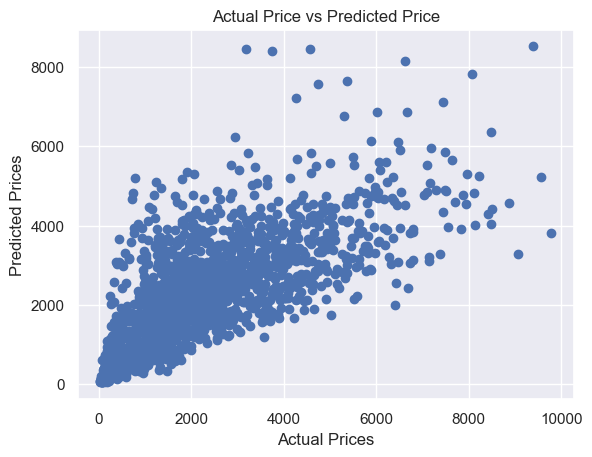

In [609]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [610]:
import pickle

In [611]:
 pickle.dump(random_regressor, open("sales_predictor.pkl", "wb"))